In [3]:
import sqlite3
conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()
cur.execute("""
CREATE TABLE IF NOT EXISTS sales (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  date TEXT NOT NULL,
  product TEXT NOT NULL,
  quantity INTEGER NOT NULL,
  price REAL NOT NULL
);
""")
rows = [
  ("2025-07-01","Laptop",2,750.00),
  ("2025-07-01","Phone",3,400.00),
  ("2025-07-02","Headphones",5,60.00),
]
cur.executemany("INSERT INTO sales(date,product,quantity,price) VALUES (?,?,?,?)", rows)
conn.commit()
conn.close()


In [5]:
import pandas as pd

conn = sqlite3.connect("sales_data.db")
query = """
SELECT product, SUM(quantity) AS total_qty, SUM(quantity*price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC;
"""
df = pd.read_sql_query(query, conn)
conn.close()

df


,product,total_qty,revenue
0,Laptop,6,4500.0
1,Phone,9,3600.0
2,Headphones,15,900.0


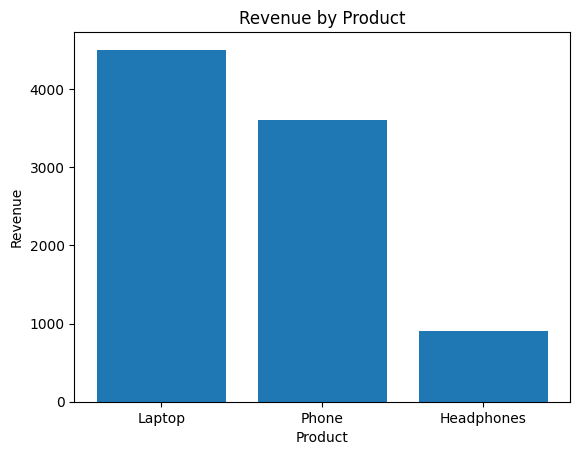

In [6]:
import matplotlib.pyplot as plt

plt.bar(df["product"], df["revenue"])
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()
